In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
import scipy

In [21]:
import os

In [22]:
import matplotlib.pyplot as plt

In [23]:
from matplotlib.pyplot import figure

In [24]:
import statsmodels.api as sm

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
import statsmodels.formula.api as smf

In [27]:
from statsmodels.formula.api import ols

In [28]:
from statsmodels.iolib.summary2 import summary_col

In [29]:
from linearmodels.panel import PanelOLS

In [30]:
import seaborn as sns

In [31]:
df = pd.read_csv('data.csv')
df2 = pd.DataFrame(df)

In [32]:
#removing all the regions in our dataset to avoid double counting

ban_list = ['AFE', 'MIC', 'AFW', 'ARB', 'TSS', 'TLA', 'TMN', 'TSA', 'CSS', 'CEB', 'EAR', 'EAS', 'EAP', 'ECA', 'ECS', 'EMU', 'WLD', 'UMC', 'SST', 'SAS', 'PSS', 'PRE', 'NAC', 'MEA', 'MNA', 'LDC', 'LIC', 'LMC', 'LMY', 'LAC', 'LCN','LTE', 'OED', 'OSS', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'EUU', 'FCS', 'HIC', 'HPC', 'PST', 'TEC', 'TEA', 'SSA', 'SSF']

In [33]:
country_only_df = df2[~df2.economy.isin(ban_list)]
#dropped non-ISO economies

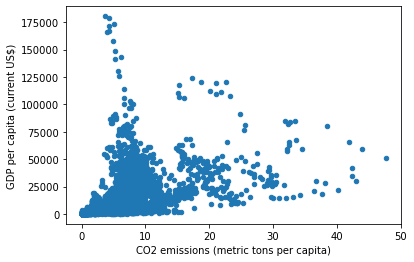

In [34]:
scatter = country_only_df.plot.scatter('CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)')

In [35]:
scatter.figure.savefig('initial scatter.pdf', dpi=300)

In [36]:
balanced_df = country_only_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])
#dropped na values and non-ISO economies. 

In [37]:
balanced_df

,economy,time,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio
131,AFG,YR2002,43.771198,NaN,NaN,0.048671,-1189.828190,NaN,11190.0,3700.0,NaN,NaN,NaN,0.032334,179.426579,NaN,NaN,NaN
132,AFG,YR2003,42.276100,NaN,NaN,0.057008,-1123.433636,NaN,11480.0,3840.0,NaN,NaN,NaN,0.011594,190.683814,NaN,NaN,NaN
133,AFG,YR2004,49.843201,NaN,NaN,0.045700,-1604.836014,NaN,11460.0,3810.0,NaN,NaN,NaN,0.010487,211.382074,NaN,NaN,NaN
134,AFG,YR2005,40.859200,NaN,NaN,0.063927,-1272.787895,NaN,11670.0,3970.0,NaN,NaN,NaN,0.012873,242.031313,NaN,NaN,NaN
135,AFG,YR2006,37.137299,NaN,NaN,0.073393,-1163.728977,NaN,14890.0,4060.0,NaN,NaN,NaN,0.015268,263.733602,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12811,ZWE,YR2014,80.775002,NaN,NaN,0.894256,1933.483643,NaN,10820.0,5840.0,NaN,NaN,NaN,0.000000,1434.896277,NaN,NaN,NaN
12812,ZWE,YR2015,81.427200,NaN,NaN,0.897598,2499.469604,NaN,11790.0,6490.0,NaN,NaN,NaN,0.000000,1445.069702,NaN,NaN,NaN
12813,ZWE,YR2016,82.792603,NaN,NaN,0.783303,1587.372070,NaN,11380.0,6090.0,NaN,NaN,NaN,0.000000,1464.588957,133.0,NaN,NaN
12814,ZWE,YR2017,83.492996,NaN,NaN,0.718570,NaN,NaN,11560.0,6280.0,NaN,NaN,NaN,0.000000,1235.189032,NaN,25.4,NaN


In [38]:
main_df = balanced_df[balanced_df['time'] >= 'YR2000']
#for the balanced df we only want from YR2000 onwards. 
             
             
             #['YR2000','YR2001', 'YR2002', 'YR2003', 'YR2004', 'YR2005','YR2006', 'YR2007', 'YR2008', 'YR2009','YR2010', 'YR2011', 'YR2012', 'YR2013', 'YR2014', 'YR2015', 'YR2016','YR2017','YR2018']]

#main_up_df = main_df.dropna(subset=['CO2 emissions (metric tons per capita)', 'GDP per capita (current US$)'])

In [39]:
#raw regressions
X = main_df['CO2 emissions (metric tons per capita)']
Y = main_df['GDP per capita (current US$)']
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
# plt.scatter(X, Y, color ="black")
# plt.plot(X, predictions, color ='green')

                                 OLS Regression Results                                 
Dep. Variable:     GDP per capita (current US$)   R-squared:                       0.332
Model:                                      OLS   Adj. R-squared:                  0.331
Method:                           Least Squares   F-statistic:                     1766.
Date:                          Sat, 07 May 2022   Prob (F-statistic):          1.06e-313
Time:                                  23:41:42   Log-Likelihood:                -39491.
No. Observations:                          3562   AIC:                         7.899e+04
Df Residuals:                              3560   BIC:                         7.900e+04
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [40]:
main_df.to_csv('main_df.csv')

In [41]:
main_up_df= main_df[main_df['CO2 emissions (metric tons per capita)'] != 0]


In [42]:
#taking logs to get more consistencies

main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/1980460622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_gdp'] = np.log(main_df["GDP per capita (current US$)"])


In [43]:
main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])

C:\Users\Anjali\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/1265170634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['log_co2'] = np.log(main_df["CO2 emissions (metric tons per capita)"])


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:42:06   Log-Likelihood:                -4186.5
No. Observations:                3551   AIC:                             8377.
Df Residuals:                    3549   BIC:                             8389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.6196      0.073    -91.032      0.0

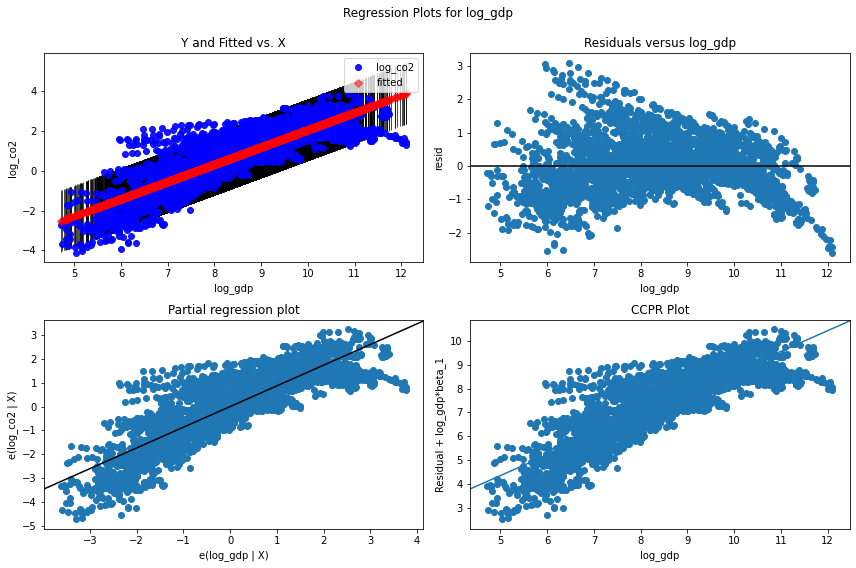

In [45]:
log_co2 = main_up_df["log_co2"].to_numpy().reshape(3551,1)
log_gdp = main_up_df["log_gdp"].to_numpy().reshape(3551,1)
model = ols('log_co2 ~ log_gdp', data=main_up_df).fit()

print(model.summary())

fig = plt.figure(figsize=(12,8))

fig = sm.graphics.plot_regress_exog(model, 'log_gdp', fig=fig)

In [46]:
main_up_df.describe() #summary statistics

,Renewable energy consumption,Fossil fuel energy consumption,CO2 intensity,CO2 emissions (metric tons per capita),Other greenhouse gas emissions,HFC gas emissions,Methane emissions,Nitrous oxide emissions,PFC gas emissions,SF6 gas emissions,"Droughts, floods, extreme temperatures",Natural gas rents (% of GDP),GDP per capita (current US$),Mortality rate due to AP,Poverty gap at $3.20 a day,Multidimensional poverty headcount ratio,log_gdp,log_co2
count,3551.000000,2136.000000,2183.000000,3551.000000,3049.000000,529.000000,3.551000e+03,3540.000000,529.000000,529.000000,163.000000,3452.000000,3551.000000,179.000000,1331.000000,378.000000,3551.000000,3551.000000
mean,32.753390,63.925065,2.288179,4.420334,-4462.656568,4238.821550,4.007905e+04,14544.104520,661.823062,1051.624197,1.162100,0.668753,12002.306876,91.029609,6.540571,27.664921,8.333435,0.624832
std,29.707675,30.960730,3.645057,5.432316,31775.907463,23167.979788,1.195768e+05,44829.018741,2676.616095,5149.740511,1.957511,3.184358,19350.324023,71.619599,11.490823,11.548350,1.539044,1.552101
min,0.000000,0.000000,0.054961,0.016313,-415197.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,111.927225,7.000000,0.000000,2.370000,4.717849,-4.115812
25%,6.653300,42.561891,1.620622,0.672440,-1588.137771,0.000000,2.250000e+03,570.000000,0.000000,0.000000,0.022075,0.000000,1244.360963,32.300000,0.200000,18.525000,7.126377,-0.396842
50%,23.580200,73.510850,2.240218,2.461614,-40.327332,73.100000,8.320000e+03,3515.000000,0.000000,0.000000,0.260471,0.000173,4094.348386,68.000000,1.200000,25.900000,8.317363,0.900817
75%,54.530449,89.038159,2.708990,6.299381,469.167861,755.000000,3.037000e+04,11032.500000,197.000000,301.200000,1.252664,0.174143,13537.875080,142.300000,7.100000,34.597500,9.513243,1.840451
max,98.342903,100.000000,103.157895,47.699934,118677.593750,300896.000000,1.242150e+06,546990.000000,28055.800000,57054.000000,9.226586,68.681470,180366.715198,324.100000,77.400000,74.200000,12.102747,3.864930


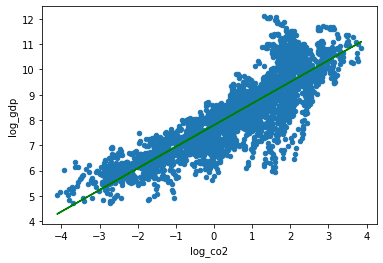

In [50]:
#scatter plot!

co2 = main_up_df["log_co2"].to_numpy().reshape(3551,1)
gdp = main_up_df["log_gdp"].to_numpy().reshape(3551,1)
model3 = LinearRegression()
model3.fit(co2, gdp)

main_up_df.plot.scatter('log_co2', 'log_gdp')
plt.plot(co2, model3.predict(co2), color ='green')
# print(predictions2)




In [51]:
#main_up_df['Develop_Dummy'] = 0 if df['Salary'] < df['Salary'].median() else 1

In [52]:
#income classifications

mid_inc_countries = ['AGO', 'ALB', 'ARG', 'ARM', 'AZE', 'BEN', 'BGD', 'BGR', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BTN', 'BWA', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'DJI', 'DMA', 'DOM', 'DZA', 'ECU', 'EGY', 'FJI', 'FSM', 'GAB', 'GEO', 'GHA', 'GNQ', 'GRD', 'GTM', 'GUY', 'HND', 'IDN', 'IND', 'IRN', 'IRQ', 'JAM', 'JOR', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'LAO', 'LBN', 'LBY', 'LCA', 'LKA', 'LSO', 'MAR', 'MDA', 'MDV', 'MEX', 'MHL', 'MRT', 'MKD', 'MYS', 'MMR', 'MNE', 'MNG', 'NGA', 'NIC', 'NPL', 'NAM', 'PAK', 'PER', 'PHL', 'PNG', 'PRY', 'PSE', 'RUS', 'STP', 'SEN', 'SLB', 'SLV', 'SRB', 'SUR', 'SWZ', 'THA', 'TUN', 'TUR', 'TUV', 'TKM', 'TLS', 'TON', 'TZA', 'UKR', 'UZB', 'VCT', 'VEN', 'VNM', 'VUT', 'WSM', 'ZAF', 'ZMB', 'ZWE']
hi_inc_countries = ['AND', 'ATG', 'AUS', 'AUT', 'BHS', 'BHR', 'ARE', 'BEL', 'BRB', 'BRN', 'CAN', 'CHE', 'CHL', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HRV', 'HUN', 'IRL', 'ISL', 'ISR', 'ITA', 'JPN', 'KNA', 'KOR', 'KWT', 'LIE', 'LTU', 'LUX', 'LVA', 'MLT', 'MUS', 'NOR', 'NLD', 'NRU','NZL', 'OMN', 'PAN', 'PLW', 'POL', 'PRT', 'QAT', 'ROU', 'SAU', 'SGP', 'SVK', 'SVN', 'SWE', 'SYC', 'TTO', 'URY', 'USA']
lo_inc_countries = ['AFG', 'BDI', 'BFA', 'CAF', 'COD', 'ERI', 'ETH', 'GIN', 'GMB', 'GNB', 'HTI', 'LBR', 'MDG', 'MLI', 'MOZ', 'MWI', 'NER', 'RWA', 'SDN', 'SLE', 'SOM', 'SSD', 'SYR', 'TCD', 'TGO', 'TJK', 'UGA', 'YEM']


In [53]:
def middle_income_func(economy):  #dummy helper functions
    if economy in mid_inc_countries:
        return 1
    else:
        return 0

In [54]:
def low_income_func(economy):
    if economy in lo_inc_countries:
        return 1
    else:
        return 0

In [55]:
def high_income_func(economy):
    if economy in hi_inc_countries:
        return 1
    else:
        return 0

In [56]:
main_up_df['economy']

131      AFG
132      AFG
133      AFG
134      AFG
135      AFG
        ... 
12811    ZWE
12812    ZWE
12813    ZWE
12814    ZWE
12815    ZWE
Name: economy, Length: 3551, dtype: object

In [57]:
# Making the income dummies

main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/2128815270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Middle_dummy'] = main_up_df['economy'].apply(middle_income_func)


In [58]:
main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/1282217178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['High_dummy'] = main_up_df['economy'].apply(high_income_func)


In [59]:
main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/379893192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Low_dummy'] = main_up_df['economy'].apply(low_income_func)


In [60]:
main_up_df.to_csv('dummy.csv')

In [61]:
gdp = main_up_df[["log_gdp", "Middle_dummy" , "High_dummy" ]]
co2 = main_up_df["log_co2"]
gdp= sm.add_constant(gdp)

model4 = sm.OLS(co2, gdp).fit()

print_model_4 = model4.summary()
print(print_model_4)

dfoutput = summary_col([model4],stars=True)
print(dfoutput)

dfoutput.as_latex()


                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     4601.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:15   Log-Likelihood:                -3780.6
No. Observations:                3551   AIC:                             7569.
Df Residuals:                    3547   BIC:                             7594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.3363      0.095    -66.940   

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


'\\begin{table}\n\\caption{}\n\\label{}\n\\begin{center}\n\\begin{tabular}{ll}\n\\hline\n               & log\\_co2    \\\\\n\\hline\nconst          & -6.3363***  \\\\\n               & (0.0947)    \\\\\nlog\\_gdp       & 0.7056***   \\\\\n               & (0.0142)    \\\\\nMiddle\\_dummy  & 1.2350***   \\\\\n               & (0.0420)    \\\\\nHigh\\_dummy    & 1.2927***   \\\\\n               & (0.0664)    \\\\\nR-squared      & 0.7956      \\\\\nR-squared Adj. & 0.7954      \\\\\n\\hline\n\\end{tabular}\n\\end{center}\n\\end{table}'

In [62]:
# latex file path code 


# printable_table = summary_col(model4, stars=True, float_format = '%0.2f')
# filepath = os.path.join(r'C:/Users/Anjali/Desktop/Boston_University_GRS/Sem3_Python/Final_Project/Final Project/table4.tex')
# f = open(filepath, 'w')
# f.write(printable_table.as_latex())
# f.close 
# print(filepath)

In [63]:
def time_converter(time):
    new_time = int(time[2:])
    return new_time

In [64]:
main_up_df['time'] = main_up_df['time'].apply(time_converter)

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/4250821334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['time'] = main_up_df['time'].apply(time_converter)


In [65]:
main_up_df['Interaction_low'] =main_up_df['log_gdp'] * main_up_df['Low_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/3707717890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_low'] =main_up_df['log_gdp'] * main_up_df['Low_dummy']


In [66]:
main_up_df['Interaction_high'] =main_up_df['log_gdp'] * main_up_df['High_dummy']

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/3951178416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_up_df['Interaction_high'] =main_up_df['log_gdp'] * main_up_df['High_dummy']


In [67]:
# what if we flip our x and y and check causal implication of Kuznet's theory
X = main_up_df[["log_gdp", "Low_dummy" , "High_dummy", "Interaction_low", "Interaction_high" ]]
gdp = main_up_df["log_co2"]
X = sm.add_constant(X)

model5 = sm.OLS(gdp, X).fit()

print_model_5 = model5.summary()
print(print_model_5)

#somewhat talks about the Kuznet curve?

                            OLS Regression Results                            
Dep. Variable:                log_co2   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     3060.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:43:16   Log-Likelihood:                -3633.0
No. Observations:                3551   AIC:                             7278.
Df Residuals:                    3545   BIC:                             7315.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.9729      0.135  

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
main_up_df_2018 = main_up_df[main_up_df['time']== 2018]

In [69]:
low_income_df = main_up_df_2018[main_up_df_2018['Low_dummy']==1]

In [70]:
middle_income_df = main_up_df_2018[main_up_df_2018['Middle_dummy']==1]

In [71]:
high_income_df = main_up_df_2018[main_up_df_2018['High_dummy']==1]

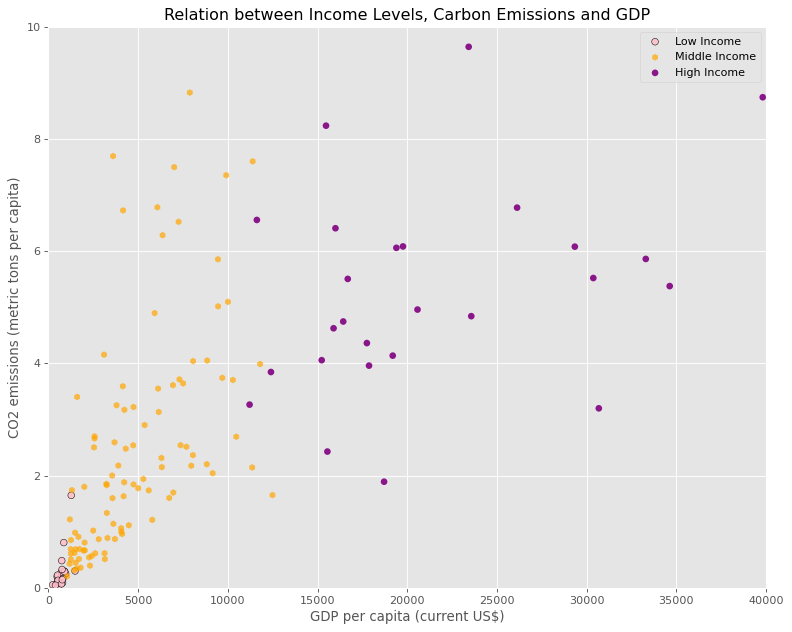

<Figure size 432x288 with 0 Axes>

In [72]:
#extension plot

color = low_income_df['Low_dummy'].apply(lambda x: 'pink')
bcolor = middle_income_df['Middle_dummy'].apply(lambda x: 'orange')
ccolor = high_income_df['High_dummy'].apply(lambda x: 'purple')
# c = ["b" if main_up_df['Low_dummy'] == 5 elif else "r" for y in y]

figure(figsize=(10, 8), dpi=80)

plt.style.use('ggplot')

plt.title('Relation between Income Levels, Carbon Emissions and GDP')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlim(0,40000)
plt.ylim(0,10)
plt.scatter(y=low_income_df['CO2 emissions (metric tons per capita)'],x=low_income_df['GDP per capita (current US$)'],c=color,marker='o', alpha = 0.9, edgecolors='black', label = "Low Income")
plt.scatter(y=middle_income_df['CO2 emissions (metric tons per capita)'],x=middle_income_df['GDP per capita (current US$)'],c=bcolor,marker='h', alpha = 0.7, edgecolors='none' , label = "Middle Income")
plt.scatter(y=high_income_df['CO2 emissions (metric tons per capita)'],x=high_income_df['GDP per capita (current US$)'],c=ccolor,marker='o', alpha = 0.9, edgecolors='none', label = "High Income")

plt.legend(loc='upper right')

plt.tight_layout()

plt.show()

plt.savefig("output.png")

In [73]:
panel_df = main_up_df.dropna(subset=['Methane emissions', 'Nitrous oxide emissions', ])

In [74]:
panel_df= panel_df[panel_df['Methane emissions'] != 0]

In [75]:
panel_df= panel_df[panel_df['Nitrous oxide emissions'] != 0]

In [76]:
data = panel_df.set_index(['economy'] ,['time'])

C:\Users\Anjali\AppData\Local\Temp/ipykernel_24368/1233393285.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  data = panel_df.set_index(['economy'] ,['time'])


In [77]:
panel_df['log_me'] = np.log(main_df['Methane emissions'])           

C:\Users\Anjali\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
panel_df['log_nox'] = np.log(main_df['Nitrous oxide emissions'])

In [79]:
panel_df = panel_df.dropna(subset=['log_nox', 'log_me'])

In [80]:
panel_df = panel_df.dropna(subset = ['time'])

In [81]:
panel_df['year'] = pd.to_datetime(panel_df['time'], format='%Y')

In [82]:
# panel_df = panel_df.set_index('year', append=True)

In [83]:
panel_df = panel_df[panel_df['time'] >= 2000]

In [84]:
panel_df = panel_df.set_index(['economy' ,'year'])

In [85]:
#panel regression
exog_vars = panel_df[["log_co2", "log_me", "log_nox"]]
end = panel_df['log_gdp']
exog = sm.add_constant(exog_vars)
model5 = PanelOLS(end, exog, entity_effects=True, time_effects = True)
fe_res = model5.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                log_gdp   R-squared:                        0.1934
Estimator:                   PanelOLS   R-squared (Between):              0.2821
No. Observations:                3440   R-squared (Within):               0.2250
Date:                Sat, May 07 2022   R-squared (Overall):              0.2771
Time:                        23:43:27   Log-likelihood                    488.60
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      258.51
Entities:                         185   P-value                           0.0000
Avg Obs:                       18.595   Distribution:                  F(3,3234)
Min Obs:                       3.0000                                           
Max Obs:                       19.000   F-statistic (robust):             258.51
                            

C:\Users\Anjali\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


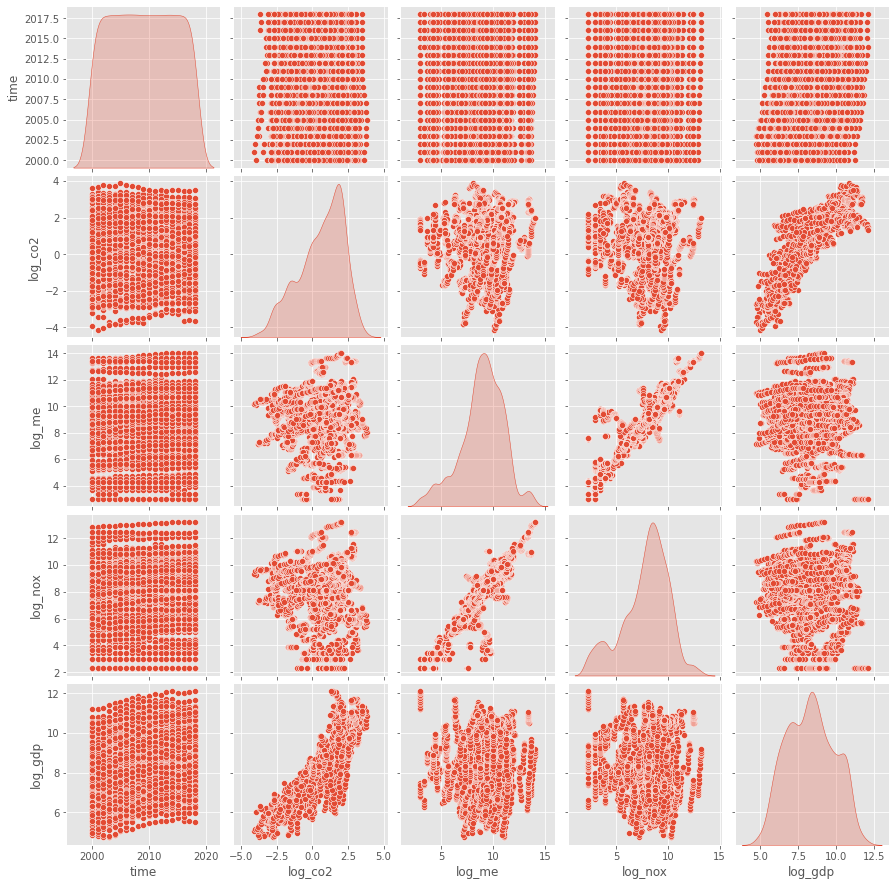

In [86]:
#sns.pairplot(panel_df['time'], panel_df['log_co2'], panel_df['log_gdp'], panel_df['log_me'], panel_df['log_nox'])
panel_df = panel_df[~panel_df.index.duplicated(keep='first')]
gas_df = panel_df[['time','log_co2', 'log_me', 'log_nox', 'log_gdp']]
gas_df = gas_df[~gas_df.index.duplicated(keep='first')]
#gas_df
#sns.histplot(panel_df.log_me, kde=True)
#plt.show()

#sns.histplot(panel_df.log_co2, kde = True)
#plt.show()

#sns.histplot(panel_df.log_nox, kde = True)
#plt.show()

sns.pairplot(gas_df, diag_kind= 'kde')

plt.savefig("output.png")


In [ ]:
#Panel Data output

print(fe_res.summary.as_latex())